<a href="https://colab.research.google.com/github/shalman13091994/self_learning/blob/main/rgbcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will train a CNN to classify images from the CIFAR-10 dataset

[project link for RGB images](https://jovian.com/paulbindass/convolutional-neural-network-world#C92)



STEPS INVOLVE IN CNN

1. Data Ingestion
2. EDA - Image sizes
3. Preprocessing/Feature engineering - Resize, normalize
4. Model building - CNN, ViT
5. Model evaluation - Accuracy, IoU

1. **Data Ingestion**

1. Load CIFAR-10 Database

In [ ]:
from tensorflow.keras.datasets import cifar10

# load the pre-shuffled train and test data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape
y_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 1)

In [ ]:
X_train.shape


(50000, 32, 32, 3)

2. Visualize the data

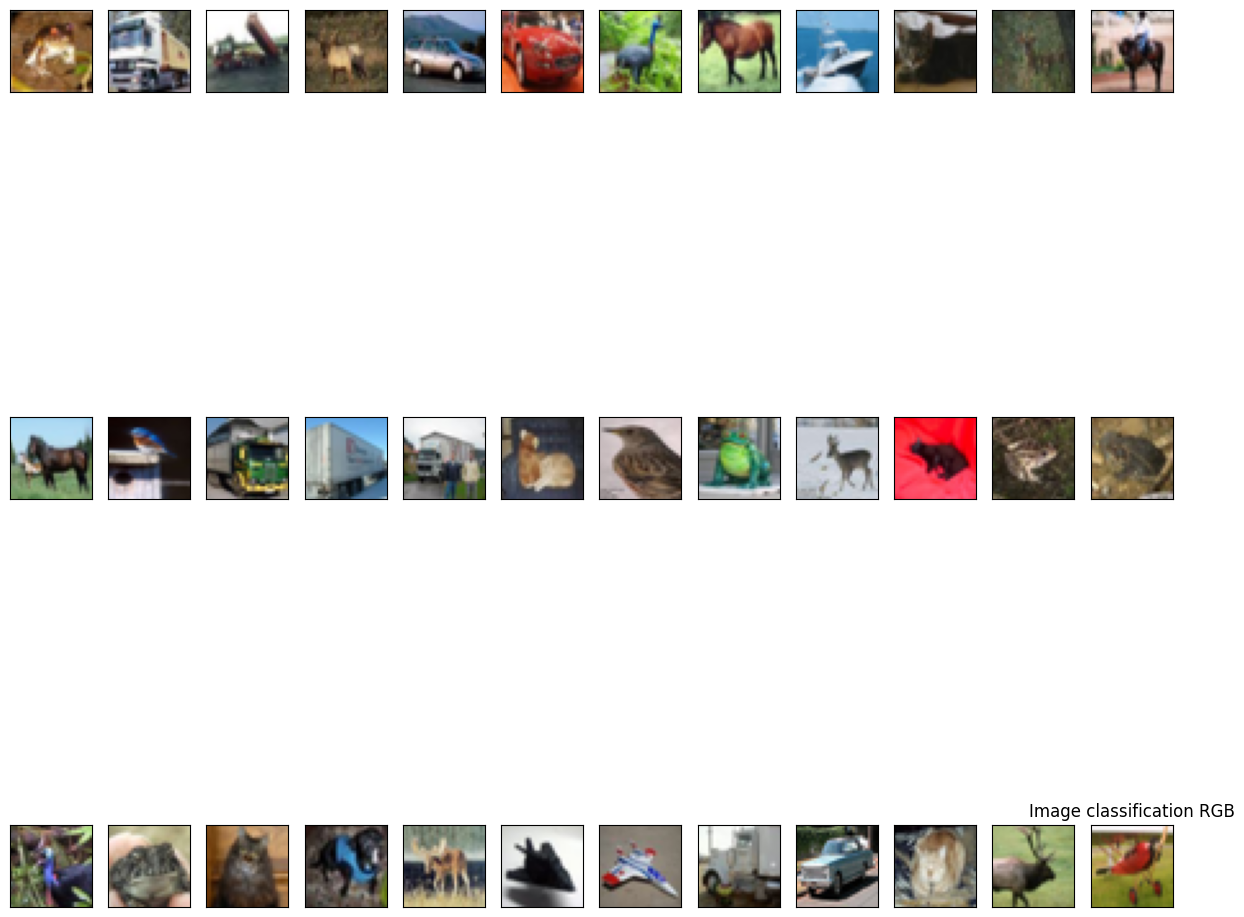

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


fig = plt.figure(figsize=(15,15))
for i in range(36):
     ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
     ax.imshow(np.squeeze(X_train[i]))
plt.title('Image classification RGB')
plt.show()


3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train.shape


(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

2. **Feature Engineering**

1. Resizing the data

its not required its already resized in (num_images, 28, 28,1) Grayscale → 1 channel RGB → 3 channels (Red, Green, Blue)


2. Split Training dataset into Testing, and Validation Sets and Normalisation

In [ ]:
# break training set into training and validation sets

from tensorflow.keras.utils import to_categorical
import numpy as np

# one-hot encode the labels - normalisation
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# break training set into training and validation sets after enconding
(x_train, x_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'x_train samples')
print(y_train.shape[0], 'y_train samples')
print(X_test.shape[0], 'x_test samples')
print(x_valid.shape[0], 'x_validation samples')



x_train shape: (45000, 32, 32, 3)
45000 x_train samples
45000 y_train samples
10000 x_test samples
5000 x_validation samples


3. **Model Architecture - MODEL BUILDING**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

#Conv2D with depth of 16
model.add(Conv2D(16, kernel_size=(3, 3), activation ='relu', padding='same',  input_shape=(32, 32, 3))) #  output of CONV_1 - (32, 32, 3)  - now depth is 16 kernels

#Max pooling - downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))  #  output  (16, 16, 3)
#Conv2D with depth of 32
model.add(Conv2D(32, kernel_size=(3, 3), activation ='relu', padding='same')) #  output  (8, 8, 3)

#Max pooling - downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv2D with depth of 64
model.add(Conv2D(64, kernel_size=(3, 3), activation ='relu', padding='same')) # output  (4, 4, 3) - while closing it can be even


#Max pooling - downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3)) # Added dropout

#flatten the layer
model.add(Flatten())

#FC1: dense the layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4)) # Stronger dropout before output layer

#FC2: dense the layer
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

4. Loss Function  -  Compile the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # change the optimizer also if accuracy is less first add dropout n increase the value n then if doesn't help change the optimizer


5. Train the model




In [ ]:
# print number of training, validation, and test images
print(x_train.shape[0])
print(y_train.shape[0], 'y_train samples')
print(x_valid.shape[0], 'validation samples')

45000
45000 y_train samples
5000 validation samples


In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #patience = 3 it will wait till 3 continuous val_loss improved

check_point = ModelCheckpoint(filepath ='bestmodel.h5', verbose =1,  save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_valid, y_valid), callbacks=[check_point, early_stop], verbose=2, shuffle=True)


Epoch 1/15

Epoch 1: val_loss improved from inf to 1.23811, saving model to bestmodel.h5


1407/1407 - 11s - 8ms/step - accuracy: 0.4335 - loss: 1.5570 - val_accuracy: 0.5634 - val_loss: 1.2381
Epoch 2/15

Epoch 2: val_loss improved from 1.23811 to 1.05241, saving model to bestmodel.h5


1407/1407 - 6s - 4ms/step - accuracy: 0.5710 - loss: 1.2007 - val_accuracy: 0.6316 - val_loss: 1.0524
Epoch 3/15

Epoch 3: val_loss improved from 1.05241 to 0.96227, saving model to bestmodel.h5


1407/1407 - 5s - 3ms/step - accuracy: 0.6256 - loss: 1.0573 - val_accuracy: 0.6624 - val_loss: 0.9623
Epoch 4/15

Epoch 4: val_loss improved from 0.96227 to 0.89342, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.6607 - loss: 0.9611 - val_accuracy: 0.6832 - val_loss: 0.8934
Epoch 5/15

Epoch 5: val_loss did not improve from 0.89342
1407/1407 - 10s - 7ms/step - accuracy: 0.6836 - loss: 0.8981 - val_accuracy: 0.6748 - val_loss: 0.9140
Epoch 6/15

Epoch 6: val_loss improved from 0.89342 to 0.82260, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7083 - loss: 0.8373 - val_accuracy: 0.7090 - val_loss: 0.8226
Epoch 7/15

Epoch 7: val_loss improved from 0.82260 to 0.77389, saving model to bestmodel.h5


1407/1407 - 10s - 7ms/step - accuracy: 0.7257 - loss: 0.7898 - val_accuracy: 0.7280 - val_loss: 0.7739
Epoch 8/15

Epoch 8: val_loss improved from 0.77389 to 0.76105, saving model to bestmodel.h5


1407/1407 - 5s - 3ms/step - accuracy: 0.7367 - loss: 0.7502 - val_accuracy: 0.7332 - val_loss: 0.7610
Epoch 9/15

Epoch 9: val_loss improved from 0.76105 to 0.74139, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7498 - loss: 0.7131 - val_accuracy: 0.7474 - val_loss: 0.7414
Epoch 10/15

Epoch 10: val_loss improved from 0.74139 to 0.72442, saving model to bestmodel.h5


1407/1407 - 5s - 3ms/step - accuracy: 0.7558 - loss: 0.6920 - val_accuracy: 0.7520 - val_loss: 0.7244
Epoch 11/15

Epoch 11: val_loss improved from 0.72442 to 0.71433, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7653 - loss: 0.6616 - val_accuracy: 0.7500 - val_loss: 0.7143
Epoch 12/15

Epoch 12: val_loss improved from 0.71433 to 0.71331, saving model to bestmodel.h5


1407/1407 - 6s - 4ms/step - accuracy: 0.7734 - loss: 0.6400 - val_accuracy: 0.7486 - val_loss: 0.7133
Epoch 13/15

Epoch 13: val_loss improved from 0.71331 to 0.69038, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7806 - loss: 0.6178 - val_accuracy: 0.7620 - val_loss: 0.6904
Epoch 14/15

Epoch 14: val_loss did not improve from 0.69038
1407/1407 - 10s - 7ms/step - accuracy: 0.7864 - loss: 0.5999 - val_accuracy: 0.7572 - val_loss: 0.6932
Epoch 15/15

Epoch 15: val_loss improved from 0.69038 to 0.68768, saving model to bestmodel.h5


1407/1407 - 5s - 4ms/step - accuracy: 0.7907 - loss: 0.5882 - val_accuracy: 0.7624 - val_loss: 0.6877


OBSERVATION ITS OVERFITTING

accuracy: 0.8923 - loss: 0.3192 - val_accuracy: 0.7108 - val_loss: 1.1989

🔢 Typical Dropout Values:

After Conv blocks: 0.2 to 0.3

After Dense layers: 0.4 to 0.5




```
Epoch 1: val_loss improved from inf to 0.99033, saving model to bestmodel.h5
WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.
1407/1407 - 56s - 40ms/step - accuracy: 0.6651 - loss: 0.9536 - val_accuracy: 0.6584 - val_loss: 0.9903
```



🔢 What each part means:
1407/1407: Number of training batches processed.

56s: Time taken for this epoch.

40ms/step: Average time taken per batch.

accuracy: 0.6651: Training accuracy = 66.51%

loss: 0.9536: Training loss.

val_accuracy: 0.6584: Validation accuracy = 65.84%

val_loss: 0.9903: Validation loss.

6. MODEL EVALUATION

In [ ]:
# evaluate test accuracy
test_score = model.evaluate(X_test, y_test, verbose=0)

train_score = model.evaluate(x_valid, y_valid, verbose=0)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Test loss: 0.7115604281425476
Test accuracy: 0.7520999908447266
Train loss: 0.687676727771759
Train accuracy: 0.7623999714851379


OBSERVATION - for overfitting only so adding Dropout will turns off some neurons during training

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


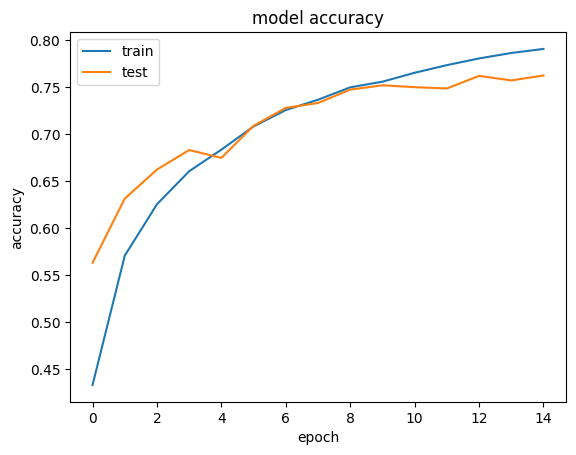

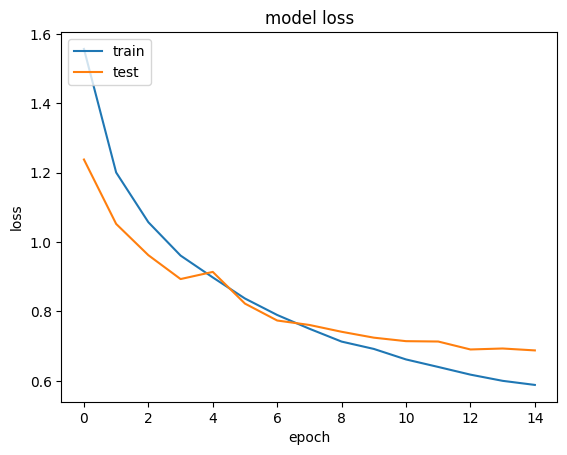

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# Access history data
history = history.history

# list all data in training
print(history.keys())

# summarize training for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Visualize Some Predictions**

In [ ]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


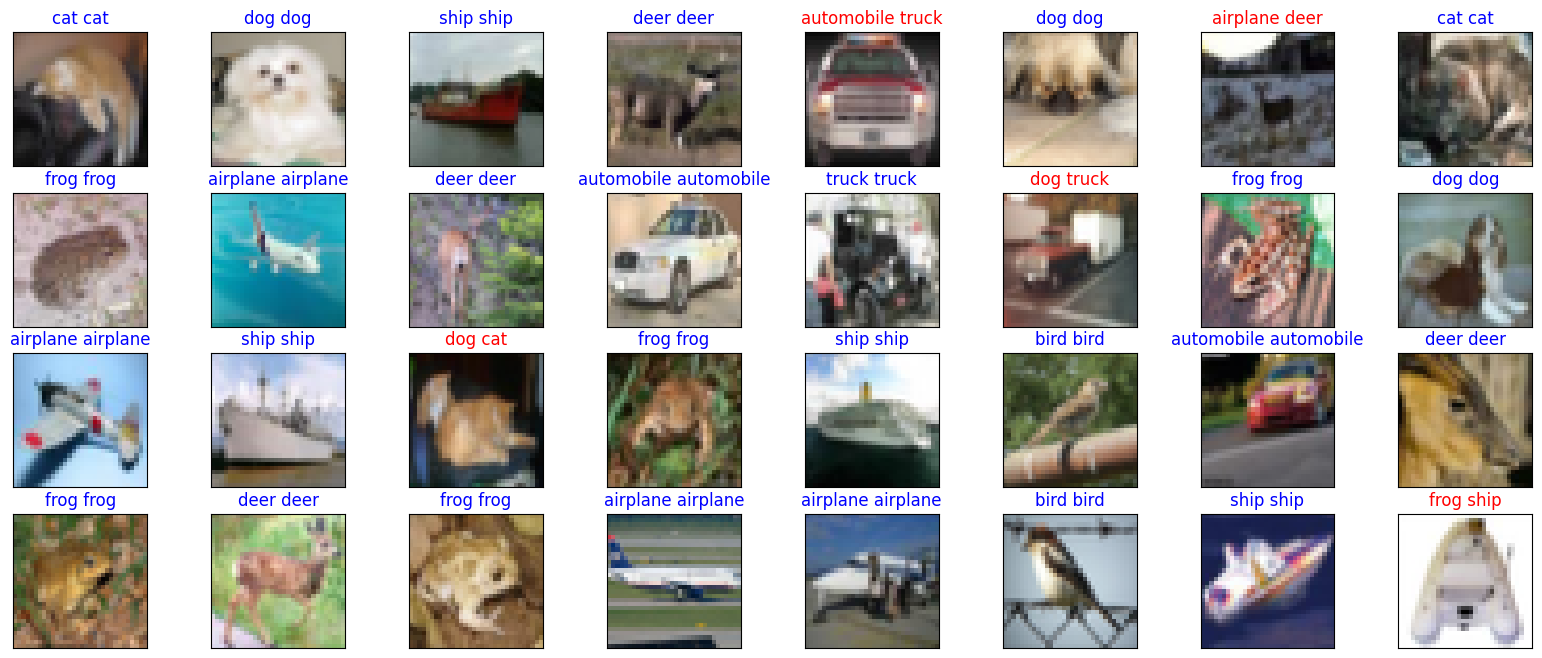

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} {}".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                   color=("blue" if pred_idx == true_idx else "red"))
